# Telco Customer Churn Analysis

## Project Overview
This project analyses customer churn in a telecommunications company to identify the key factors driving customer attrition and estimate the financial impact of churn.

Customer churn is a major business problem because acquiring new customers is significantly more expensive than retaining existing ones. The objective of this analysis is to:

Understand the overall churn rate
Identify the characteristics of customers who are most likely to churn
Analyse the main reasons customers leave
Estimate the revenue lost due to churn
Provide data-driven business recommendations to improve customer retention.

Dataset: Telco Customer Churn Dataset
Source: IBM Sample Dataset
Rows: 7,000 customers
Features: Demographics, services, and billing information
Columns: 30+
Target Variable: Churn

## Executive Summary
This analysis investigates customer churn in a telecommunications company to identify key churn drivers and estimate the financial impact of customer attrition.

Key findings:

The company has a 27% churn rate, representing a major retention challenge.
Month-to-month customers and early-tenure customers are most likely to churn.
Fiber internet users, electronic check users, and customers without Tech Support show the highest churn risk.
Customer churn results in significant monthly revenue loss.
Several high-risk customer segments still active represent revenue at risk.
This analysis provides data-driven recommendations to improve retention, pricing strategy, and customer experience.

# Data Loading

The dataset used in this project contains customer demographic information, services subscribed, account details, and churn status. The data is loaded and prepared for analysis using Python and pandas.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Display all columns
pd.set_option("display.max_columns", None)

# Try GitHub-style path first
if os.path.exists("data/Telco_customer_churn.xlsx"):
    df = pd.read_excel("data/Telco_customer_churn.xlsx")

# Otherwise use your PC path
else:
    df = pd.read_excel("telco_churn_analysis/data/Telco_customer_churn.xlsx")

df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [3]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

# Data Cleaning and Preparation

Before conducting the analysis, the dataset was cleaned to ensure consistent data types and remove missing values that could affect the results. Key steps performed: Removed unnecessary identifier columns, converted incorrect data types, converted Total Charges to numeric and removed rows where Total Charges is missing.

The dataset contains customer demographic information, services subscribed, account details, and churn status after cleaning and preprocessing.

In [4]:
print("Initial shape:", df.shape)

# Convert Total Charges to numeric
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")

# Only remove rows where Total Charges is missing
df = df[df["Total Charges"].notna()]

# Rename churn column
df.rename(columns={"Churn Value": "Churn"}, inplace=True)

# Drop CustomerID safely
df.drop(columns=["CustomerID"], errors="ignore", inplace=True)

print("Shape after cleaning:", df.shape)

print("\nChurn Distribution:")
print(df["Churn"].value_counts())


Initial shape: (7043, 33)
Shape after cleaning: (7032, 32)

Churn Distribution:
Churn
0    5163
1    1869
Name: count, dtype: int64


The cleaned dataset contains 7,032 customers and 32 variables after removing missing Total Charges and unnecessary identifier columns.

# Exploratory Data Analysis (EDA)

The goal of this section is to explore customer churn patterns and identify the key factors associated with customer attrition.

Overall Customer Churn Rate
Understanding the overall churn rate provides a baseline for the analysis and highlights the scale of the retention problem.

In [5]:
# Calculate churn rate
churn_rate = df["Churn"].mean() * 100

print(f"Overall churn rate: {churn_rate:.2f}%")


Overall churn rate: 26.58%


Insight
The churn rate of 27% indicates a substantial customer retention challenge.The following analysis explores which customer groups are most at risk.

## Churn Rate by Contract Type
Customer contracts can strongly influence churn behaviour. This analysis examines how churn varies across different contract types.

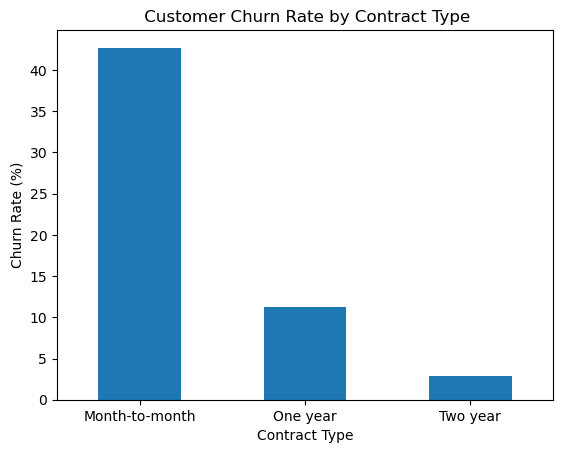

In [6]:
# Churn rate by contract type
contract_churn = df.groupby("Contract")["Churn"].mean().sort_values(ascending=False) * 100
contract_churn.plot(kind="bar")
plt.title(" Customer Churn Rate by Contract Type")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Contract Type")
plt.xticks(rotation=0)
plt.show()


Insight
Customers on month-to-month contracts have the highest churn rate by a large margin.
Customers with one-year and two-year contracts are significantly more likely to stay.
This suggests that longer-term contracts play a major role in customer retention.

## Churn by Monthly Charges
Monthly charges may influence customer churn behaviour. This analysis explores whether customers paying higher monthly fees are more likely to leave.

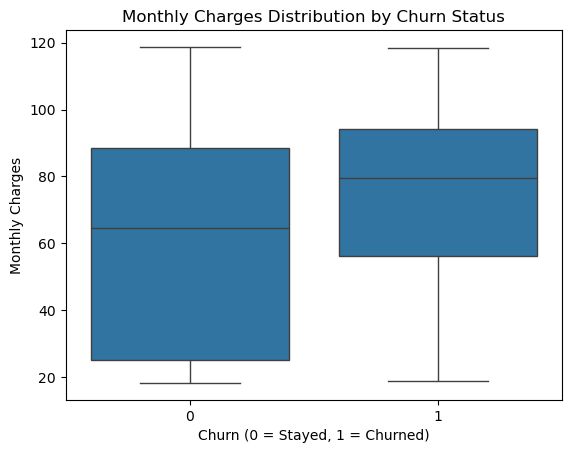

In [7]:
plt.figure()
sns.boxplot(x="Churn", y="Monthly Charges", data=df)
plt.title("Monthly Charges Distribution by Churn Status")
plt.xlabel("Churn (0 = Stayed, 1 = Churned)")
plt.ylabel("Monthly Charges")

plt.show()


## Churn by Customer Tenure
Customer tenure represents how long a customer has remained with the company. Understanding the relationship between tenure and churn helps identify when customers are most at risk of leaving.

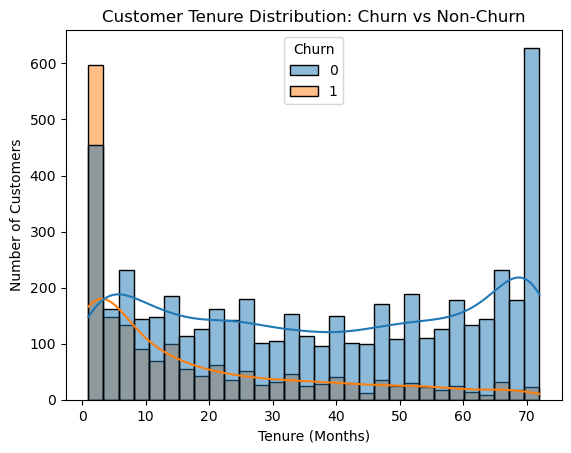

In [8]:
plt.figure()
sns.histplot(data=df, x="Tenure Months", hue="Churn", bins=30, kde=True)
plt.title("Customer Tenure Distribution: Churn vs Non-Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")

plt.show()


Insight

Customers who churn are heavily concentrated in the early months of their subscription. Long-tenure customers are significantly more likely to remain with the company.

This suggests that the first year of the customer lifecycle is the highest-risk period for churn. Early engagement and onboarding strategies could significantly improve retention.

## Main Reasons for Customer Churn
Understanding the main reasons customers leave provides direct insight into operational and strategic improvements the company can implement.

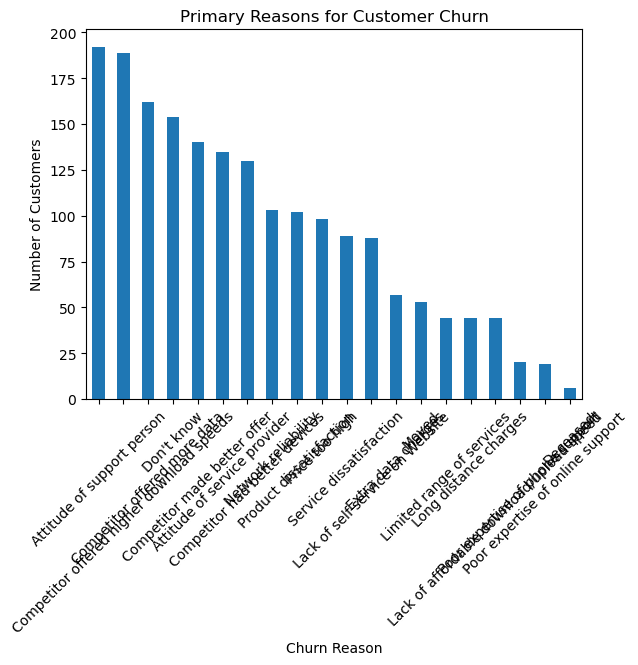

In [9]:
# Count churn reasons (only for customers who churned)
churn_reasons = df[df["Churn"] == 1]["Churn Reason"].value_counts()

plt.figure()
churn_reasons.plot(kind="bar")
plt.title("Primary Reasons for Customer Churn")
plt.xlabel("Churn Reason")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)

plt.show()


Insight
The most common churn reasons are related to pricing, service dissatisfaction, and competitor offerings.
This indicates that churn is not random — it is driven by identifiable and potentially preventable factors. Addressing service quality issues and reviewing pricing competitiveness could significantly reduce customer attrition.

## Customer Segmentation Analysis
To gain deeper insight, we analyse churn across different customer segments to identify high-risk groups that should be prioritised for retention strategies.

Churn by Internet Service

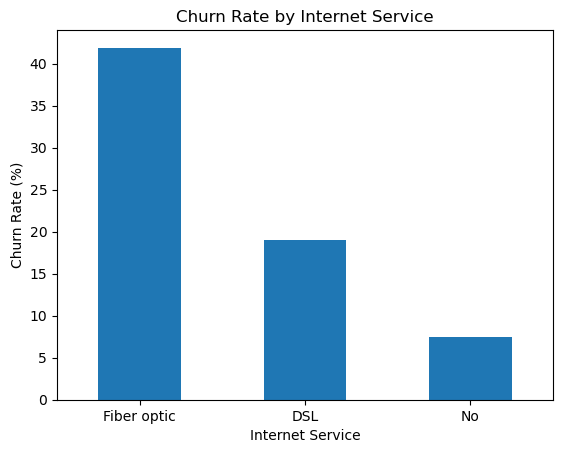

In [10]:
# Churn rate by Internet Service
internet_churn = df.groupby("Internet Service")["Churn"].mean().sort_values(ascending=False) * 100

plt.figure()
internet_churn.plot(kind="bar")
plt.title("Churn Rate by Internet Service")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Internet Service")
plt.xticks(rotation=0)

plt.show()


Insight
Customers using fiber optic internet show the highest churn rate compared to DSL and customers without internet service.
This suggests potential service quality or pricing issues affecting fiber customers.

Churn by Payment Method

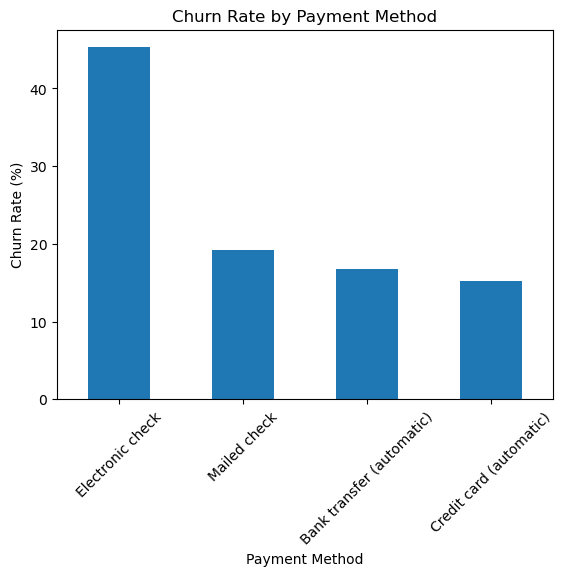

In [11]:
# Churn rate by Payment Method
payment_churn = df.groupby("Payment Method")["Churn"].mean().sort_values(ascending=False) * 100

plt.figure()
payment_churn.plot(kind="bar")
plt.title("Churn Rate by Payment Method")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Payment Method")
plt.xticks(rotation=45)

plt.show()


Insight
Customers using electronic check payments have the highest churn rate.
This may indicate lower customer commitment or a higher likelihood of switching providers.

Churn by Tech Support

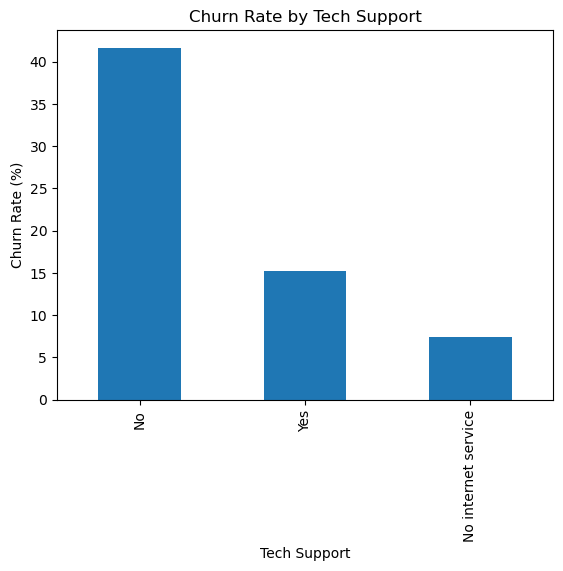

In [12]:
# Churn rate by Tech Support
tech_churn = df.groupby("Tech Support")["Churn"].mean().sort_values(ascending=False) * 100

plt.figure()
tech_churn.plot(kind="bar")
plt.title("Churn Rate by Tech Support")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Tech Support")

plt.show()


Insight
Customers without Tech Support churn significantly more than customers who have support.
This suggests that support services play an important role in customer retention.

## Churn by Tenure Cohorts
Customers are grouped into tenure ranges to better understand when churn risk is highest during the customer lifecycle.

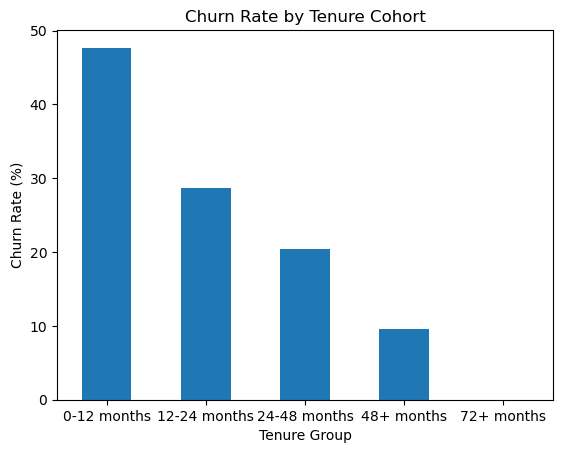

In [13]:
# Create tenure groups
bins = [0,12,24,48,72,100]
labels = ["0-12 months","12-24 months","24-48 months","48+ months","72+ months"]

df["TenureGroup"] = pd.cut(df["Tenure Months"], bins=bins, labels=labels)
tenure_churn = df.groupby("TenureGroup", observed=False)["Churn"].mean() * 100

plt.figure()
tenure_churn.plot(kind="bar")
plt.title("Churn Rate by Tenure Cohort")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Tenure Group")
plt.xticks(rotation=0)

plt.show()


Insight
Customers in their first 12 months show the highest churn rate by a large margin.
Churn risk drops significantly as customer tenure increases, highlighting the importance of early customer engagement and onboarding.

## High-Risk Active Customers (Revenue at Risk)
We identify active customers who match high-risk churn characteristics to estimate the revenue currently at risk.

In [14]:
# Define high-risk customers
high_risk = df[
    (df["Contract"]=="Month-to-month") &
    (df["Tenure Months"]<12) &
    (df["Churn"]==0)
]

high_risk_count = high_risk.shape[0]
high_risk_revenue = high_risk["Monthly Charges"].sum()

print(f"High-risk active customers: {high_risk_count}")
print(f"Estimated monthly revenue at risk: ${high_risk_revenue:,.2f}")



High-risk active customers: 917
Estimated monthly revenue at risk: $45,034.20


Insight
917 active customers match the high-risk churn profile (month-to-month contracts, tenure under 12 months).
These customers represent approximately $45,034.20 in monthly revenue at risk, highlighting a strong opportunity for targeted early-retention campaigns.

## Estimated Revenue Loss Due to Churn
Understanding the financial impact of churn helps prioritise retention strategies and highlights the urgency of reducing customer attrition.

In [15]:
# Calculate monthly revenue lost from churned customers
monthly_revenue_lost = df[df["Churn"] == 1]["Monthly Charges"].sum()

print(f"Estimated monthly revenue lost due to churn: ${monthly_revenue_lost:,.2f}")


Estimated monthly revenue lost due to churn: $139,130.85


Insight
Customer churn results in a substantial monthly revenue loss for the company. Reducing churn would have a direct and measurable impact on revenue and long-term profitability.
This highlights the importance of investing in targeted retention strategies.

# Key Insights

The company is experiencing a 27% churn rate, meaning more than one quarter of customers are leaving.
Customers on month-to-month contracts have the highest churn risk.
Customers with higher monthly charges are more likely to churn.
Churn occurs mostly in the early months of the customer lifecycle, highlighting a critical early-retention gap.
Fiber optic internet customers show the highest churn among internet service types.
Customers using electronic check payments have the highest churn rate.
Customers without Tech Support churn significantly more than those with support.
Service dissatisfaction and competitor offerings are major drivers of churn.
Customer churn results in significant monthly revenue loss, impacting long-term profitability.

# Business Recommendations

Based on the analysis, the telecom company should prioritise the following actions:
1. Strengthen Early Customer Retention
Customers are most likely to churn within the first year.
Implement onboarding programs, welcome offers, and early engagement campaigns.

2. Encourage Long-Term Contracts
Month-to-month customers churn significantly more.
Offer discounts and incentives for annual and multi-year contracts.

3. Improve Fiber Internet Experience
Fiber customers have the highest churn.
Investigate service reliability, pricing, and customer satisfaction for fiber plans.

4. Promote Tech Support & Service Bundles
Customers without Tech Support churn more.
Bundle support services with internet packages to increase retention.

5. Review Pricing Strategy
Higher monthly charges are associated with churn.
Introduce flexible pricing, bundles, and loyalty discounts.

6. Improve Payment Experience
Electronic check users churn the most.
Encourage automatic payments and offer incentives for switching payment methods.

7. Monitor Competitor Offerings
Regularly review competitor pricing and packages to remain competitive.


#  Limitations & Next Steps

This project focuses on exploratory data analysis and segmentation.

Future work could include building a churn prediction model.

Customer segmentation could be expanded further using clustering techniques.